In [1]:
import hyperopt
import tensorflow as tf
import keras
from hyperopt import fmin, tpe, hp
import matplotlib.pyplot as plt
from tensorflow.keras.datasets import mnist
from keras import utils
from tensorflow.keras import layers
from tensorflow.keras.layers import Dense,Dropout,Flatten
from tensorflow.keras.models import Sequential
from keras.optimizers import SGD
from sklearn.datasets import make_classification
from scikeras.wrappers import KerasClassifier

## Преобразование данных

**Будем использовать набор данных MNIST, который состоит из полутоновых изображений рукописных цифр (0–9), размер которых составляет 28x28 пикселей. Каждый пиксель имеет 8 бит, поэтому его значение колеблется от 0 до 255**

In [2]:
# Загрузка данных
(x_train, y_train),(x_test, y_test) = mnist.load_data()
x_train.shape, y_train.shape, x_test.shape,y_test.shape

((60000, 28, 28), (60000,), (10000, 28, 28), (10000,))

In [3]:
# Нормализуем значения пикселей (дать им значения от 0 до 1)

x_train, x_test = x_train / 255.0, x_test / 255.0

In [4]:
# Преобразуем массивы 2D-изображений в 1D (сглаживаем их). 
# Выполнить это можно используя изменение формы массива с помощью numpy.reshape()
# или keras.layers.Flatten который преобразует формат изображений из 2-мерного массива (размером 28 на 28 пикселей) 
# в 1-мерный массив размером 28 * 28 = 784 пикселей.

x_train = x_train.reshape(60000, 784)
x_test = x_test.reshape(10000, 784)


In [5]:
# One Hot Encodingy
y_train = utils.to_categorical(y_train, 10)
y_test =utils. to_categorical(y_test, 10)
y_test.shape, y_train.shape

((10000, 10), (60000, 10))

## Построение модели

In [6]:
input = keras.Input(shape=(784,))
layers_1 = layers.Dense(300,activation = 'relu')(input)
layers_1 = layers.Dense(300,activation = 'relu')(layers_1)

output = layers.Dense(10, activation = 'softmax')(layers_1)


model = keras.Model(inputs=input,outputs = output)
model.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 784)]             0         
                                                                 
 dense (Dense)               (None, 300)               235500    
                                                                 
 dense_1 (Dense)             (None, 10)                3010      
                                                                 
Total params: 238510 (931.68 KB)
Trainable params: 238510 (931.68 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [7]:
model.compile(optimizer='adam',
              loss = 'categorical_crossentropy',
              metrics = ['accuracy'])

In [19]:
his = model.fit(x_train, y_train, epochs=20, batch_size=32,validation_split=0.2)

Epoch 1/20
1500/1500 [==============================] - 4s 3ms/step - loss: 0.0083 - accuracy: 0.9976 - val_loss: 0.1135 - val_accuracy: 0.9728
Epoch 2/20
1500/1500 [==============================] - 4s 3ms/step - loss: 0.0083 - accuracy: 0.9974 - val_loss: 0.1122 - val_accuracy: 0.9750
Epoch 3/20
1500/1500 [==============================] - 5s 3ms/step - loss: 0.0086 - accuracy: 0.9973 - val_loss: 0.1076 - val_accuracy: 0.9783
Epoch 4/20
1500/1500 [==============================] - 5s 3ms/step - loss: 0.0073 - accuracy: 0.9975 - val_loss: 0.1151 - val_accuracy: 0.9785
Epoch 5/20
1500/1500 [==============================] - 5s 3ms/step - loss: 0.0077 - accuracy: 0.9973 - val_loss: 0.1098 - val_accuracy: 0.9791
Epoch 6/20
1500/1500 [==============================] - 5s 3ms/step - loss: 0.0055 - accuracy: 0.9982 - val_loss: 0.1229 - val_accuracy: 0.9763
Epoch 7/20
1500/1500 [==============================] - 5s 4ms/step - loss: 0.0071 - accuracy: 0.9978 - val_loss: 0.1119 - val_accuracy:

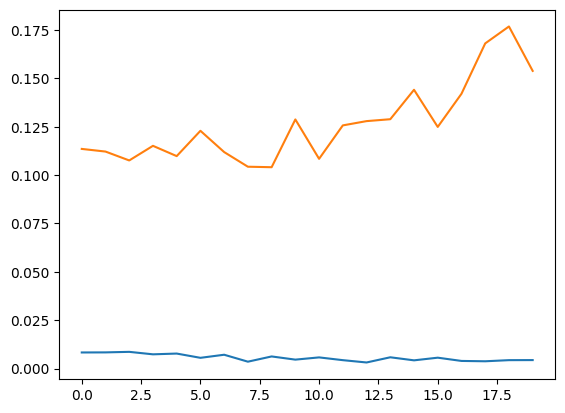

In [20]:
plt.plot(his.history['loss'])
plt.plot(his.history['val_loss'])
plt.show()

In [16]:
input = keras.Input(shape=(784,))
layers_1 = layers.Dense(300,activation = 'relu')(input)
layers.Dropout(0.4)
output = layers.Dense(10, activation = 'softmax')(layers_1)


model = keras.Model(inputs=input,outputs = output)
model.summary()

Model: "model_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_5 (InputLayer)        [(None, 784)]             0         
                                                                 
 dense_8 (Dense)             (None, 300)               235500    
                                                                 
 dense_9 (Dense)             (None, 10)                3010      
                                                                 


Total params: 238510 (931.68 KB)
Trainable params: 238510 (931.68 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [17]:
model.compile(optimizer='adam',
              loss = 'categorical_crossentropy',
              metrics = ['accuracy'])

In [18]:
his = model.fit(x_train, y_train, epochs=10, batch_size=32,validation_split=0.2)

Epoch 1/10
1500/1500 [==============================] - 5s 3ms/step - loss: 0.2455 - accuracy: 0.9274 - val_loss: 0.1267 - val_accuracy: 0.9638
Epoch 2/10
1500/1500 [==============================] - 7s 4ms/step - loss: 0.1016 - accuracy: 0.9695 - val_loss: 0.0999 - val_accuracy: 0.9702
Epoch 3/10
1500/1500 [==============================] - 6s 4ms/step - loss: 0.0660 - accuracy: 0.9805 - val_loss: 0.0883 - val_accuracy: 0.9732
Epoch 4/10
1500/1500 [==============================] - 5s 3ms/step - loss: 0.0459 - accuracy: 0.9858 - val_loss: 0.0917 - val_accuracy: 0.9741
Epoch 5/10
1500/1500 [==============================] - 5s 3ms/step - loss: 0.0336 - accuracy: 0.9892 - val_loss: 0.0823 - val_accuracy: 0.9776
Epoch 6/10
1500/1500 [==============================] - 5s 3ms/step - loss: 0.0252 - accuracy: 0.9924 - val_loss: 0.0887 - val_accuracy: 0.9762
Epoch 7/10
1500/1500 [==============================] - 5s 4ms/step - loss: 0.0183 - accuracy: 0.9945 - val_loss: 0.0902 - val_accuracy:

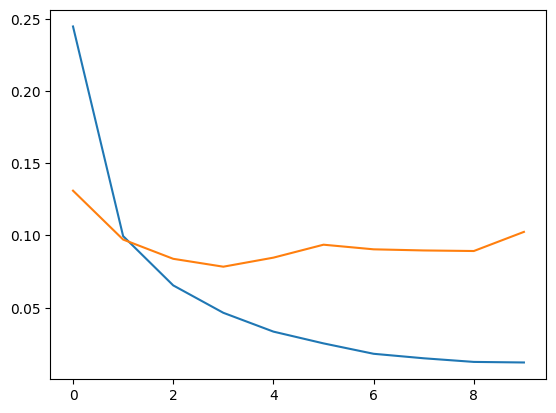

In [15]:
plt.plot(his.history['loss'])
plt.plot(his.history['val_loss'])
plt.show()